# Machine Learning

### Modelos de Machine Learning
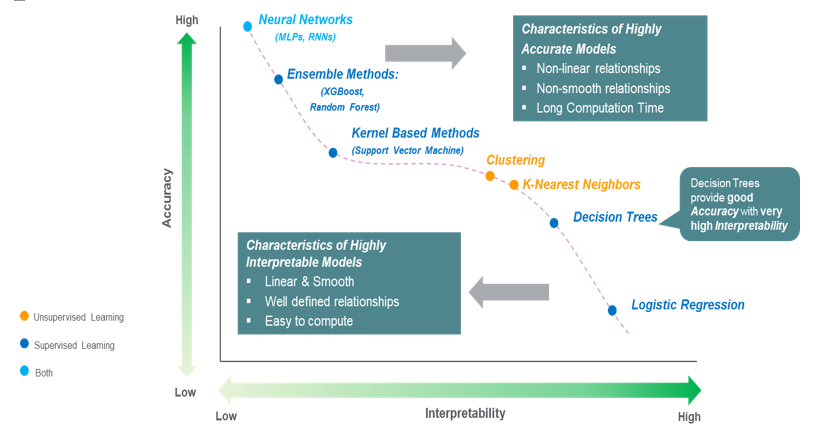

In [1]:
from sklearn import preprocessing
import pandas as pd
import numpy as np

df = pd.read_csv("base_datos_2008.csv", nrows = 100000)

# Suprimo los datos faltantes de las columnas que nos interesa observar.
df = df[["ArrDelay", "DepDelay", "Distance", "AirTime"]].dropna()

In [2]:
df.head()

ArrDelay  DepDelay  Distance  AirTime
0     -14.0       8.0       810    116.0
1       2.0      19.0       810    113.0
2      14.0       8.0       515     76.0
3      -6.0      -4.0       515     78.0
4      34.0      34.0       515     77.0

In [3]:
# Vamos a normalizar todas las variables para que estén dentro de una misma escala, centrada en 0.
X_scaled = preprocessing.scale(df)
X_scaled

array([[-0.63713243, -0.08247884,  0.40657043,  0.4452521 ],
       [-0.12045009,  0.3068154 ,  0.40657043,  0.38990966],
       [ 0.26706167, -0.08247884, -0.26709367, -0.29264705],
       ...,
       [ 1.84940134,  2.18250582,  0.53445243,  0.31611975],
       [ 0.17018373,  0.37759617,  0.53445243,  0.1869874 ],
       [ 0.17018373, -0.25943077,  0.53445243,  0.22388235]])

In [4]:
# Calculamos la media de cada una de las columnas, prácticamente es 0.
X_scaled.mean(axis = 0)

array([2.47651119e-17, 1.07267490e-17, 1.19506063e-16, 1.01364179e-16])

In [5]:
# Hacemos lo mismo con desviación estándar. Todas las variables están centradas en el 0 con una desviación estándar = 1.
X_scaled.std(axis = 0)

array([1., 1., 1., 1.])

In [6]:
# Si no tenemos una distribución de los datos el retraso en la salida 8 frente a la llegada 14 ¿cuánto es? Si no tenemos
# un escalado de los datos no se puede saber.
df.iloc[2]

ArrDelay     14.0
DepDelay      8.0
Distance    515.0
AirTime      76.0
Name: 2, dtype: float64

In [7]:
# Valor por encima de la media el primero, el tercero y cuarto por debajo de la media.
X_scaled[2]

array([ 0.26706167, -0.08247884, -0.26709367, -0.29264705])

In [8]:
# Vamos a realizar otro tipo de escalado de datos, aplicamos MinMax.
# Los datos ya no están centrados en 0, explicitamos el rango de valores que queremos que tenga.
min_max_scaler = preprocessing.MinMaxScaler([0,10])
# Adapta los datos atendiendo a nuestro dataframe
X_train_minmax = min_max_scaler.fit_transform(df)
X_train_minmax
# Hay que tener en cuenta los outliers si son muchos, en este caso quedarían fuera de la distribución.

array([[0.77199282, 0.92857143, 3.15557514, 2.91316527],
       [1.05924596, 1.125     , 3.15557514, 2.82913165],
       [1.27468582, 0.92857143, 1.85544293, 1.79271709],
       ...,
       [2.15439856, 2.07142857, 3.4023799 , 2.71708683],
       [1.22082585, 1.16071429, 3.4023799 , 2.5210084 ],
       [1.22082585, 0.83928571, 3.4023799 , 2.57703081]])

Los datos en este caso ya no están centrados en el cero y tienen otra escala.

Lo que hacíamos con OneHotEconding, podemos hacerlo de la siguiente forma, transformamos variables categóricas en numéricas.

In [9]:
df = pd.read_csv("base_datos_2008.csv", nrows = 100)
pd.get_dummies(df["Origin"])

# Nos transforma la categoría Origin que tenía las categorías de la cabecera en 0's y 1', de acuerdo con lo visto anteriormente.

IAD  IND  ISP  JAN  JAX  LAS
0     1    0    0    0    0    0
1     1    0    0    0    0    0
2     0    1    0    0    0    0
3     0    1    0    0    0    0
4     0    1    0    0    0    0
..  ...  ...  ...  ...  ...  ...
95    0    0    0    0    0    1
96    0    0    0    0    0    1
97    0    0    0    0    0    1
98    0    0    0    0    0    1
99    0    0    0    0    0    1

[100 rows x 6 columns]

# Aprendizaje supervisado vs no supervisado

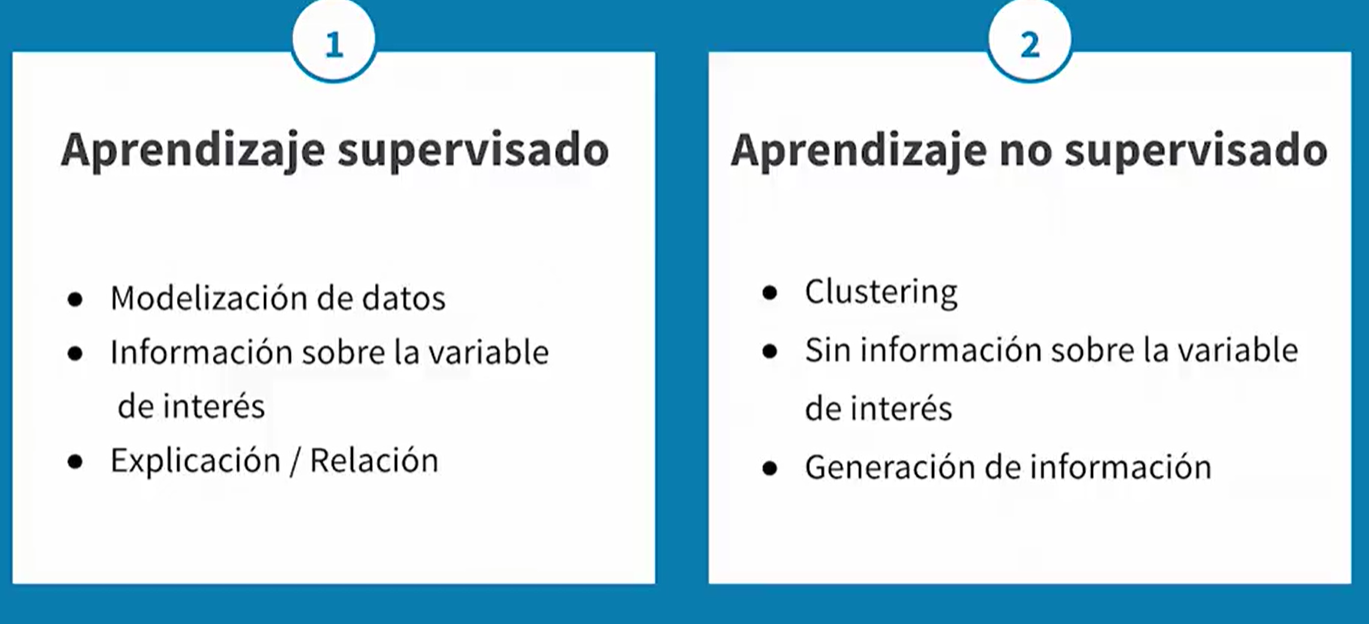

# Clustering

https://scikit-learn.org/stable/modules/clustering.html#k-means 

Dentro de los algoritmos no supervisados, podemos ver el de clasificación o clustering.

El objetivo del clustering es separar una población en grupos asegurando que cada uno de ellos tenga la misma varianza. Genera conjuntos disjuntos, asignando cada punto al centroide más cercano. 

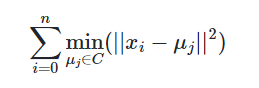

¿Cómo definimos la varianza?

En teoría de probabilidad, la varianza o varianza de una variable aleatoria es una medida de dispersión definida como la esperanza (media) del cuadrado de la desviación de dicha variable respecto a su media. 

https://es.wikipedia.org/wiki/Varianza

In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv("base_datos_2008.csv", nrows = 1e5)


In [11]:
df.head()

Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4   2003.0        1955   2211.0   
1  2008      1           3          4    754.0         735   1002.0   
2  2008      1           3          4    628.0         620    804.0   
3  2008      1           3          4    926.0         930   1054.0   
4  2008      1           3          4   1829.0        1755   1959.0   

   CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0        2225            WN        335  ...    4.0      8.0          0   
1        1000            WN       3231  ...    5.0     10.0          0   
2         750            WN        448  ...    3.0     17.0          0   
3        1100            WN       1746  ...    3.0      7.0          0   
4        1925            WN       3920  ...    3.0     10.0          0   

   CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0               NaN         0           NaN          NaN      NaN   
1               NaN         0           NaN          NaN      NaN   
2               NaN         0           NaN          NaN      NaN   
3               NaN         0           NaN          NaN      NaN   
4               NaN         0           2.0          0.0      0.0   

   SecurityDelay  LateAircraftDelay  
0            NaN                NaN  
1            NaN                NaN  
2            NaN                NaN  
3            NaN                NaN  
4            0.0               32.0  

[5 rows x 29 columns]

In [12]:
newdf = df[["AirTime", "DepDelay"]].dropna()
newdf.head(100)

AirTime  DepDelay
0     116.0       8.0
1     113.0      19.0
2      76.0       8.0
3      78.0      -4.0
4      77.0      34.0
..      ...       ...
95    183.0      26.0
96    177.0      69.0
97     84.0       4.0
98     73.0      36.0
99    221.0      69.0

[100 rows x 2 columns]

In [13]:
# Número de clusters = 4, añado una semilla con random_state y utilizo todos los procesadores del portátil.
# Ajusto el modelo con fit.
# random_state = 0 nos permite ejecutar el modelo varias veces con la misma división aleatoria de los datos.
kmeans = KMeans(n_clusters = 4, random_state = 0).fit(newdf)
kmeans.labels_

# Obtenemos el cluster al que pertenecen cada una de nuestras observaciones.

array([3, 3, 1, ..., 0, 3, 3])

random_state = 0 nos ayuda a verificar y validar los datos cuando se ejecuta el código varias veces. Establecer random_state en un valor fijo garantizará que se genere la misma secuencia de números aleatorios cada vez que se ejecute el código.
fit, permite ajustar el modelo.

In [14]:
# Con la siguiente instrucción analizamos cómo han quedado distribuidos los individuos en cada uno de los grupos.
np.unique(kmeans.labels_, return_counts = True)
# Como se puede observar han quedado distribuidos de manera muy dispar, 3944 al primer grupo,...

(array([0, 1, 2, 3]), array([ 3944, 60402,  8274, 26078], dtype=int64))

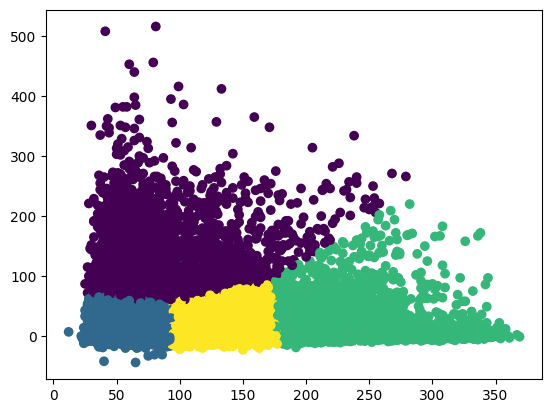

In [15]:
# Vamos a visualizar cómo quedan distribuidos los centroides.
import matplotlib.pyplot as plt
plt.scatter(newdf["AirTime"], newdf["DepDelay"], c= kmeans.labels_)
plt.show()

Se puede observar que hay dos grupos a la izquierda muy cargados y próximos, y otros dos con mucha dispersión.

In [16]:
# Vamos a ver dónde quedan situados los centroides.
kmeans.cluster_centers_

array([[ 79.50946731, 116.4478667 ],
       [ 58.86814825,   5.65975557],
       [224.74990908,  10.03576191],
       [128.07685235,   5.12600567]])

In [17]:
# Si queremos utilizar nuestro objeto kmeans para predecir a qué cluster van a pertenecer nuevos puntos.

alldf = pd.read_csv("base_datos_2008.csv", nrows = 1e6)[["AirTime", "DepDelay"]].dropna()

In [18]:
# Vamos a mostrar cómo quedan clasificados los primeros 100
kmeans.predict(alldf)[0:100]

array([3, 3, 1, 1, 1, 1, 2, 2, 1, 1, 3, 0, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1,
       1, 1, 1, 1, 0, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1,
       3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 2])

Si probamos con un clúster de 10...

In [19]:
# Vamos a evaluar el número óptimo de clústers con la técnica del codo.
import seaborn as sns
newdfc = pd.read_csv("base_datos_2008.csv", nrows = 1e5)[["AirTime", "DepDelay"]].dropna()

Text(0.5, 1.0, 'Técnica del codo para encontrar el tamaño óptimo de las agrupaciones')

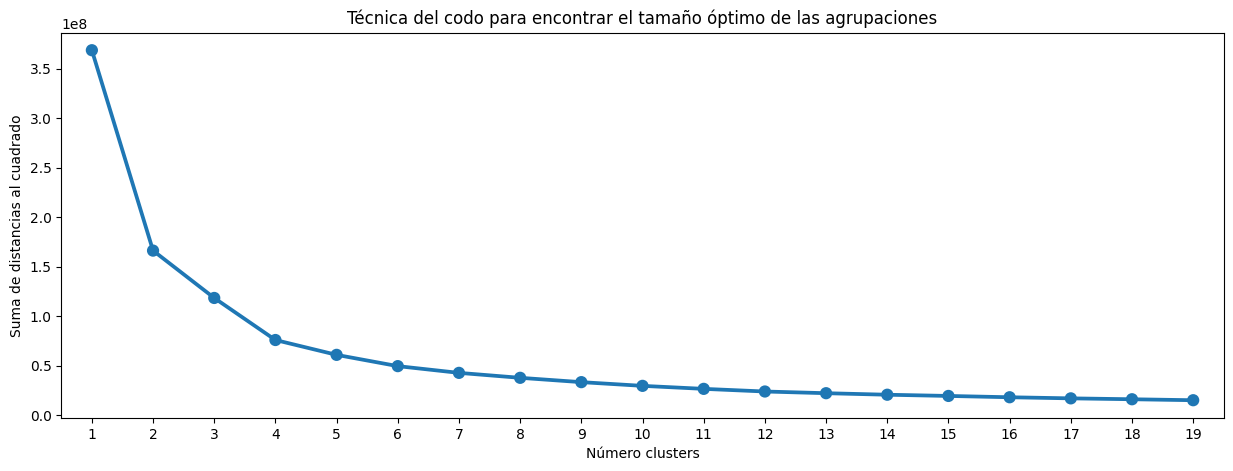

In [20]:
# Buscará el número óptimo de clústeres basándose en el método del codo como se indica a continuación:
SS_distance = {}
for k in range(1,20):
    mod = KMeans(n_clusters= k, max_iter=1000,init = 'k-means++')
    mod = mod.fit(newdfc)
    SS_distance[k] = mod.inertia_

#Plotting the sum of square distance values and numbers of clusters
plt.figure(figsize = (15,5))
sns.pointplot(x = list(SS_distance.keys()), y = list(SS_distance.values()))
plt.xlabel("Número clusters")
plt.ylabel("Suma de distancias al cuadrado")
plt.title("Técnica del codo para encontrar el tamaño óptimo de las agrupaciones")

https://jarroba.com/seleccion-del-numero-optimo-clusters/

# Regresión Lineal

In [21]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("base_datos_2008.csv")

El objetivo de este modelo es aproximar a una recta el conjunto de datos. € (error del modelo).
- Es necesario que la relación entre las variables sea lineal.
- Las variables explicativas no tienen relación entre ellas.
- Homocedasticidad (varianza constante, si predecimos los salarios en base a la edad, habría que encontrar los mismos errores para gente joven que para gente mayor).
- El error total sea la suma de todos los errores.

Y se corresponde con la variable independiente y X corresponde con las variables explicativas o regresoras.

Y = $\beta_0$ +  $\beta_1$ $X_1$ +  $\beta_2$ $X_2$ +  $\beta_3$ $X_3$ + .... + €

https://blog.minitab.com/es/analisis-de-regresion-como-puedo-interpretar-el-r-cuadrado-y-evaluar-la-bondad-de-ajuste

El R-cuadrado es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como coeficiente de determinación, o coeficiente de determinación múltiple si se trata de regresión múltiple.

El R-cuadrado siempre está entre 0 y 100%:

- 0% indica que el modelo no explica ninguna porción de la variabilidad de los datos de respuesta en torno a su media.
- 100% indica que el modelo explica toda la variabilidad de los datos de respuesta en torno a su media.

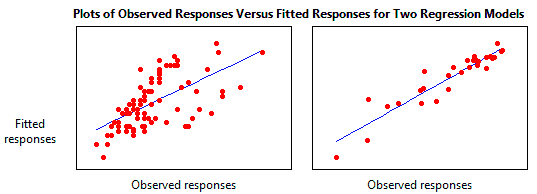

El modelo de regresión de la izquierda explica el 38% de la varianza, mientras que el de la derecha explica el 87,4%. Cuanto mayor sea la varianza explicada por el modelo de regresión, más cerca estarán los puntos de los datos de la línea de regresión ajustada. En teoría, si un modelo pudiera explicar el 100% de la varianza, los valores ajustados siempre serían iguales a los valores observados y, por lo tanto, todos los puntos de los datos estarían sobre la línea de regresión ajustada.

In [22]:
# Vamos a determinar el retraso en la llegada a partir del retraso en la salida.
# Ambas variables están muy correlacionadas.
df = df.dropna(subset = ["ArrDelay"])
# Seleccionamos un subconjunto de 100.000 líneas que vamos a mezclar.
df = df.sample(frac = 1).head(100000)
# Vamos a determinar predecir el retraso en la llegada ArrDelay a partir del retraso en la salida DepDelay
Y = df["ArrDelay"]
X = df[["DepDelay"]]

In [23]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [24]:
# A continuación ajustamos el modelo.
regr = linear_model.LinearRegression()
# Ajuste con X e Y definidos con anterioridad.
regr.fit(X, Y)

# Imprimimos el valor de las Betas... corresponden con los coeficientes de las variables dependientes 
# (en este caso sólo hay una).
print("Coeficientes: ", regr.coef_)

# El valor próximo a 1 nos indica que está cercano a la varianza, desviación al cuadrado respecto a la media.
# Estamos explicando el 86,9 % de la varianza.

Y_pred = regr.predict(X)
# R2 nos va a decir cuán bueno es el modelo, cuanto más próximo a 1, el modelo es mejor.
print("R cuadrado: ", r2_score(Y, Y_pred))

Coeficientes:  [1.01743468]
R cuadrado:  0.8635464429864304


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 595600 to 2371355
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               100000 non-null  int64  
 1   Month              100000 non-null  int64  
 2   DayofMonth         100000 non-null  int64  
 3   DayOfWeek          100000 non-null  int64  
 4   DepTime            100000 non-null  float64
 5   CRSDepTime         100000 non-null  int64  
 6   ArrTime            100000 non-null  float64
 7   CRSArrTime         100000 non-null  int64  
 8   UniqueCarrier      100000 non-null  object 
 9   FlightNum          100000 non-null  int64  
 10  TailNum            100000 non-null  object 
 11  ActualElapsedTime  100000 non-null  float64
 12  CRSElapsedTime     100000 non-null  float64
 13  AirTime            100000 non-null  float64
 14  ArrDelay           100000 non-null  float64
 15  DepDelay           100000 non-null  float64
 

C:\Users\Carlow\AppData\Local\Temp\ipykernel_29532\4221679496.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.scatter(X[1:10000], Y[1:10000], color = "black")


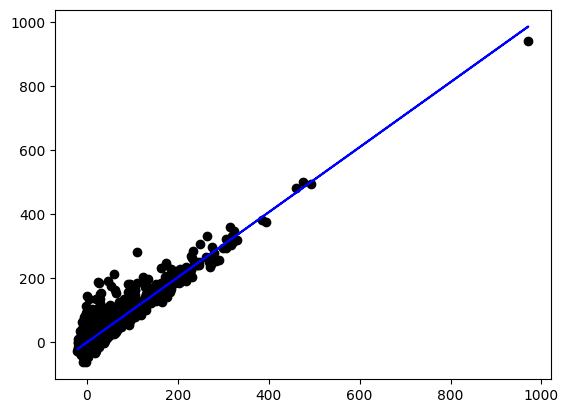

In [26]:
# Mostramos los resultados de forma gráfica, junto con la recta de regresión.
plt.scatter(X[1:10000], Y[1:10000], color = "black")
plt.plot(X[1:10000], Y_pred[1:10000], color = "blue")
plt.show()

# Regresión Logística

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("base_datos_2008.csv")

# En este caso el modelo se aplica a categorías que no responden a valores numéricos continuos.
# Se utiliza de forma binaria, para predecir si un cliente va a comprar un determinado producto o no.
# Los valores devueltos por la expresión se encuentran entre 0 y 1.

P(y) = $\left(\frac{1}{e^(\beta_0 + \beta_1 X_1 +  \beta_2 X_2 +  \beta_3 X_3 + ... + €)}\right)$

https://es.wikipedia.org/wiki/Regresi%C3%B3n_log%C3%ADstica

Determinamos la probabilidad de que suceda el evento p dividida por la probabilidad de que este evento no suceda. Este cálculo estará en función de las variables independientes y los parámetros betas que dan peso a estas variables.

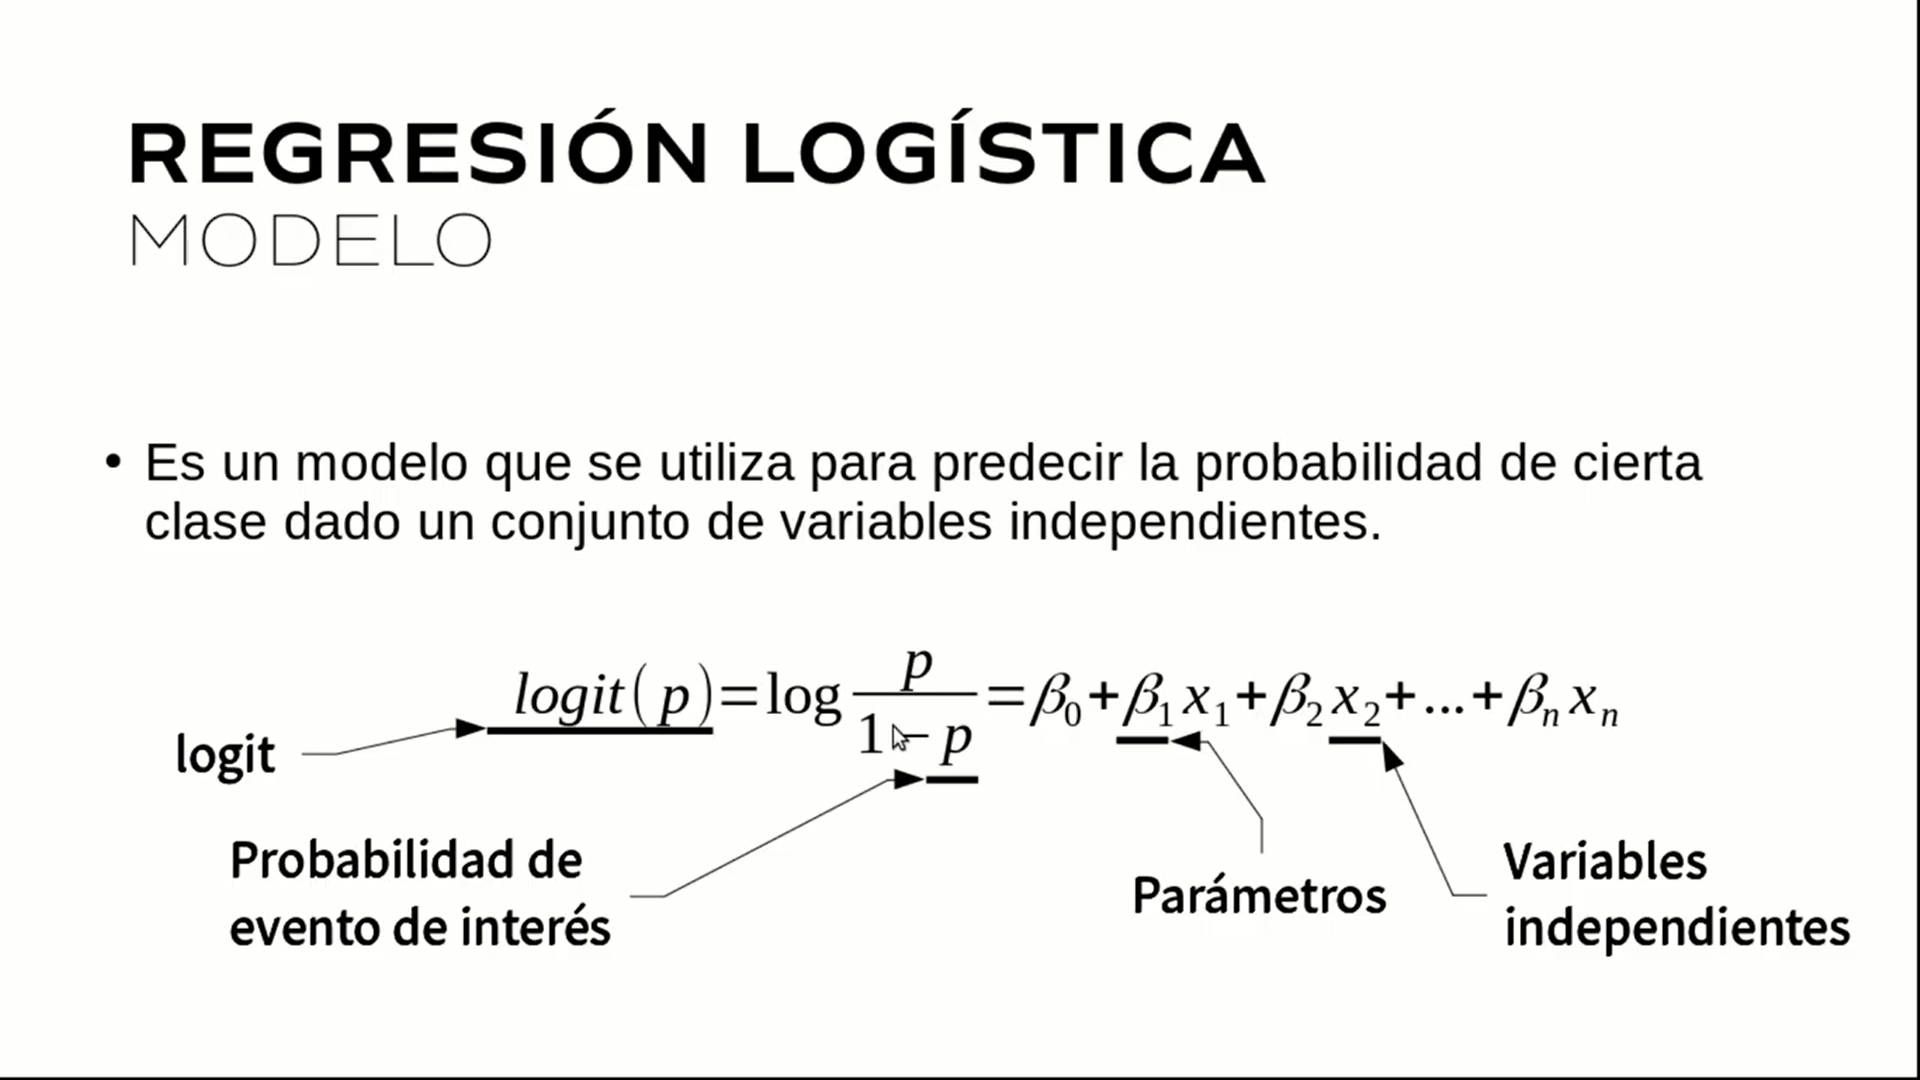

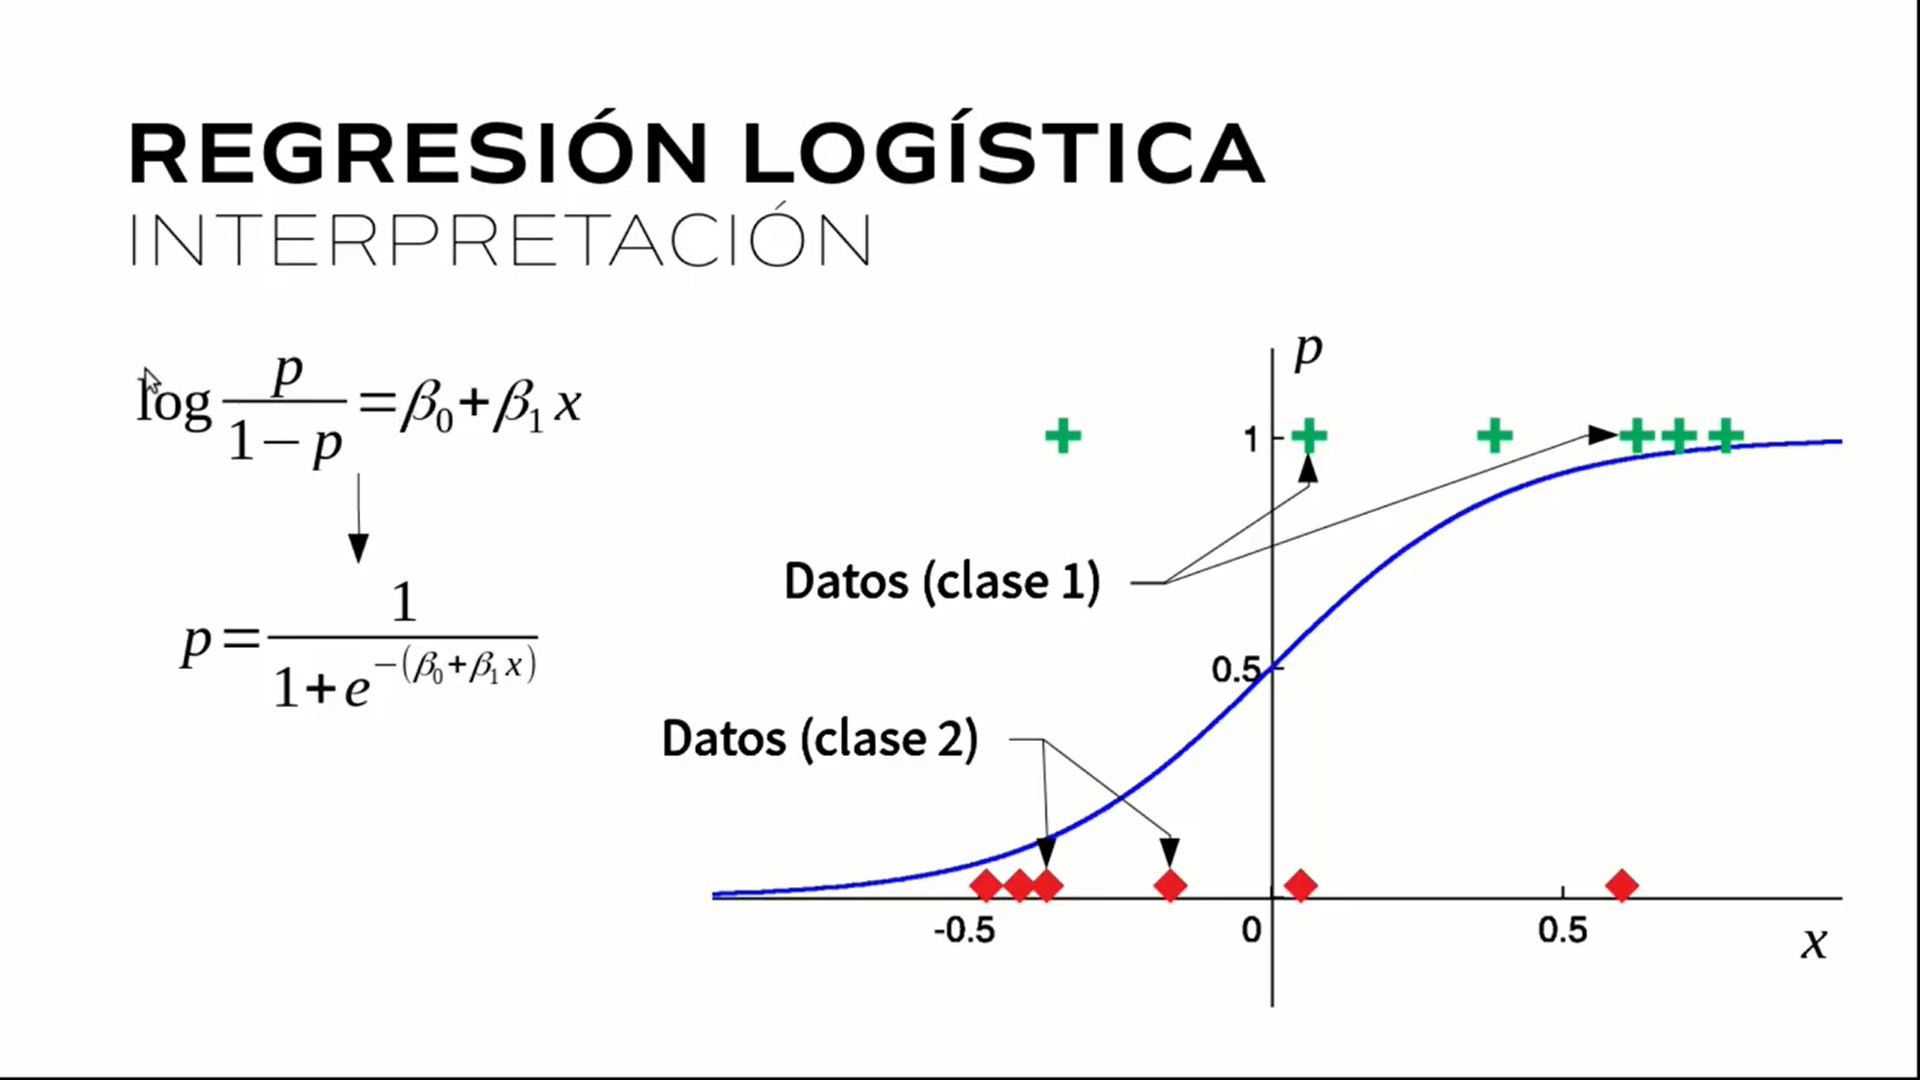

https://www.youtube.com/watch?v=SeM4Rtoa4EU

In [28]:
# Vamos a determinar el retraso en la llegada a partir del retraso en la salida.
# Ambas variables están muy correlacionadas.
df = df.dropna(subset = ["ArrDelay"])
df = df.sample(frac = 1).head(100000)
Y = df["ArrDelay"] < 30 # Esta será nuestra variable respuesta: vuelos sin y con retraso (True = 1 / False = 0)
X = df[["DepDelay"]]

In [29]:
# Creamos el modelo con LogisticRegression()
logreg = LogisticRegression()
# Ajustamos el modelo con fit
logreg.fit(X, Y)
# Obtenemos las predicciones
Y_pred = logreg.predict(X)

In [30]:
# La regresión logística nos devuelve probabilidades, selecciona la categoría con probabilidad superior.
np.round(logreg.predict_proba(X),3)
# El primer caso tiene una probabilidad de un 1% de pertenecer al grupo 0 (sin retraso) y 
# un 98.2 de pertenecer al grupo 1 (con retraso)

array([[0.021, 0.979],
       [0.038, 0.962],
       [0.008, 0.992],
       ...,
       [1.   , 0.   ],
       [0.013, 0.987],
       [0.004, 0.996]])

Se puede ver que en los tres primeros casos es muy probable que el vuelo no tenga retraso notable. % elem 0,0 - % elem 0,1

In [31]:
# 95,59% de las predicciones es correcta. Vemos en qué caso nuestras predicciones coinciden con el valor real.
np.mean(Y_pred == Y)

0.95653

In [32]:
# En el caso real, tenemos una aproximación del 86,40%, sabemos que en un 86,40% de los casos el vuelo no se retrasa
np.mean(Y)

0.86411

In [33]:
# Las filas son los valores reales (Y), las columnas las predicciones (Y_pred), 10126 (False) ha predicho como 0,  
# 1028 eran los casos que no se habían retrasado, pero que nuestro modelo ha considerado que sí.
# 85596 que son los casos que no se han retrasado y nuestro modelo lo ha clasificado bien.
confusion_matrix = confusion_matrix(Y, Y_pred)
print(confusion_matrix)

# (0,0) -> En este caso el valor real de los datos eran 0 (False = con retraso) y el modelo ha predicho como 0 (con retraso).
# (0,1) -> En este caso el valor real de los datos eran 0 (False = con retraso) y el modelo ha predicho como 1 (sin retraso).
# (1,0) -> En este caso el valor real de los datos eran 1 (True = sin retraso) y el modelo ha predicho como 0 (con retraso).
# (1,1) -> En este caso el valor real de los datos eran 1 (True = sin retraso) y el modelo ha predicho como 1 (sin retraso).

[[10253  3336]
 [ 1011 85400]]


Text(50.722222222222214, 0.5, 'Realidad')

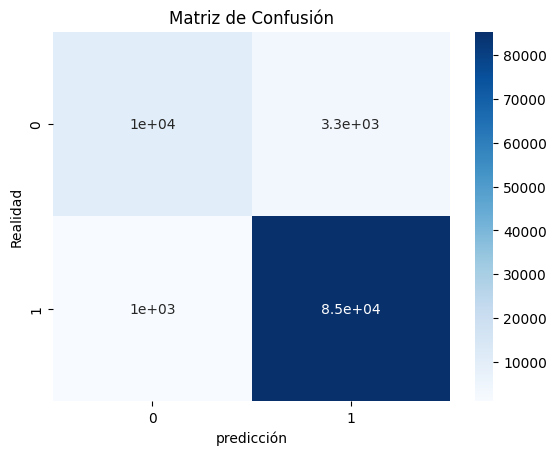

In [34]:
f,ax=plt.subplots()

sns.heatmap(confusion_matrix, annot=True, ax=ax, cmap="Blues") #Dibuja un mapa de calor

ax.set_title('Matriz de Confusión') #título
ax.set_xlabel('predicción') #eje x
ax.set_ylabel('Realidad') #eje y

# Bayes, se expresa la probabilidad de un evento aleatorio A, dado B.

In [35]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv("base_datos_2008.csv", nrows = 100000)
df = df.sample(frac = 1)
df = df.head(500000)

Este modelo permite calcular la probabilidad del suceso de un evento y dado x a la probabilidad de x dado y. Permite detectar causalidades entre eventos de forma sencilla.

Para este modelo existen tres variantes vinculadas:
   - Bernouilli, se puede utilizar para el análisis de texto.
   - Multinomial, se utiliza también para el análisis de texto.
   - Gaussian, se utiliza para datos continuos, asume que las variables regresoras están distribuidas normalmente.
    
Este modelo supone que todas las variables son independientes, cosa que no es cierta (de ahí el nombre de ingenuo == naive).

https://es.wikipedia.org/wiki/Teorema_de_Bayes

https://scikit-learn.org/stable/modules/naive_bayes.html

In [36]:
df = df.dropna(subset = ["ArrDelay"])

In [37]:
# Variable respuesta, el retraso en la llegada con vuelos retrasados al menos un minuto.
Y = df["ArrDelay"] > 0

In [38]:
# En este caso las variables Month, DayofMonth, DayofWeek, TailNum las pasamos a variables categóricas, 
# para ello utilizamos la función apply(str).
# Con get_dummies, como vimos anteriormente, transformamos dichas variables a conjuntos 1,0,0...0; 0,1,0...0;...;0,0,0...1;

df["Month"] = df["Month"].apply(str)
df["DayofMonth"] = df["DayofMonth"].apply(str)
df["DayOfWeek"] = df["DayOfWeek"].apply(str)
df["TailNum"] = df["TailNum"].apply(str)

X = pd.get_dummies(data = df[["Month", "DayofMonth", "TailNum", "DayOfWeek", "Origin", "Dest", "UniqueCarrier"]])

In [39]:
X.head()

Month_1  DayofMonth_1  DayofMonth_10  DayofMonth_11  DayofMonth_12  \
63117        1             0              0              0              0   
38555        1             0              0              0              0   
81636        1             0              0              0              0   
44550        1             0              0              0              0   
29292        1             0              0              0              1   

       DayofMonth_13  DayofMonth_14  DayofMonth_15  DayofMonth_16  \
63117              0              0              0              0   
38555              0              0              1              0   
81636              0              0              0              0   
44550              0              0              0              1   
29292              0              0              0              0   

       DayofMonth_17  ...  Dest_SMF  Dest_SNA  Dest_STL  Dest_SYR  Dest_TPA  \
63117              0  ...         0         0         0         0         0   
38555              0  ...         0         0         0         0         0   
81636              0  ...         0         0         0         0         0   
44550              0  ...         0         0         0         0         0   
29292              0  ...         0         0         0         0         0   

       Dest_TUL  Dest_TUS  Dest_XNA  UniqueCarrier_WN  UniqueCarrier_XE  
63117         0         0         0                 1                 0  
38555         0         0         0                 1                 0  
81636         0         0         0                 1                 0  
44550         0         0         0                 1                 0  
29292         0         0         0                 1                 0  

[5 rows x 827 columns]

In [40]:
# Ajustar el modelo
clf = BernoulliNB()
#clf = MultinomialNB()
clf.fit(X, Y)
Y_pred = clf.predict(X)

In [41]:
# Porcentaje de casos clasificados correctamente.
np.mean(Y == Y_pred)
# Nos predice casi un 66% de los casos.

0.6598512634501206

In [42]:
# Vemos la media general de todos los casos, retraso en la llegada > 0.
1 - np.mean(Y)
# Estamos ganando un 8% más en nuestro análisis explicativo, parece poco.

0.5789681655150054

In [43]:
X = df[["AirTime", "Distance", "TaxiIn", "TaxiOut"]] #Depdelay
clf = GaussianNB()
clf.fit(X, Y)
Y_pred = clf.predict(X)

In [44]:
np.mean(Y == Y_pred)

0.6428093781028997

In [45]:
X = df[["AirTime", "Distance", "TaxiIn", "TaxiOut", "DepDelay"]] #Depdelay
clf = GaussianNB()
clf.fit(X, Y)
Y_pred = clf.predict(X)

In [46]:
np.mean(Y == Y_pred)

0.8201078036029099

# Árboles de Clasificación y Regresión

https://fhernanb.github.io/libro_mod_pred/arb-de-regre.html

Los árboles de clasificación están pensados para los datos categóricos, los de regresión para los numéricos.

Para los árboles de clasificación, lo que tratamos es separar la variable que es más explicativa, separándola en dos grupos de forma que generemos dos ramas:

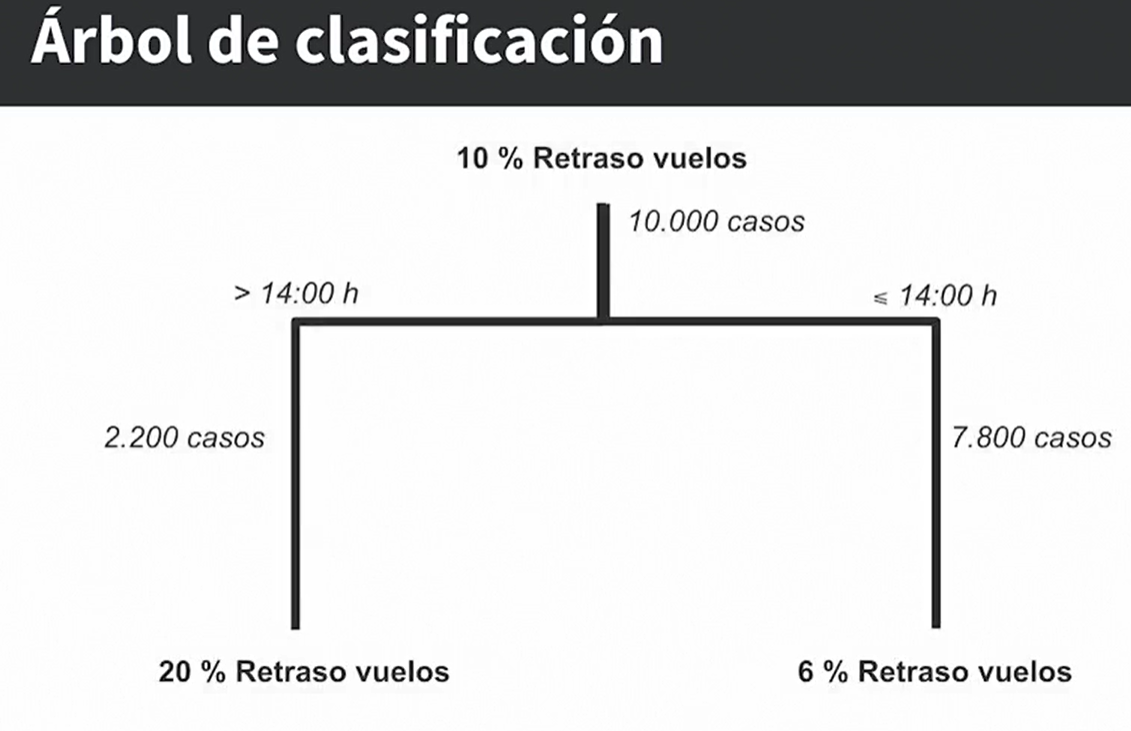

Sin embargo, para los modelos de regresión, buscamos un valor que divida en dos grupos, si queremos predecir el número de minutos que se va a retrasar un vuelo y no si se retrasa o no, este es el modelo a utilizar.

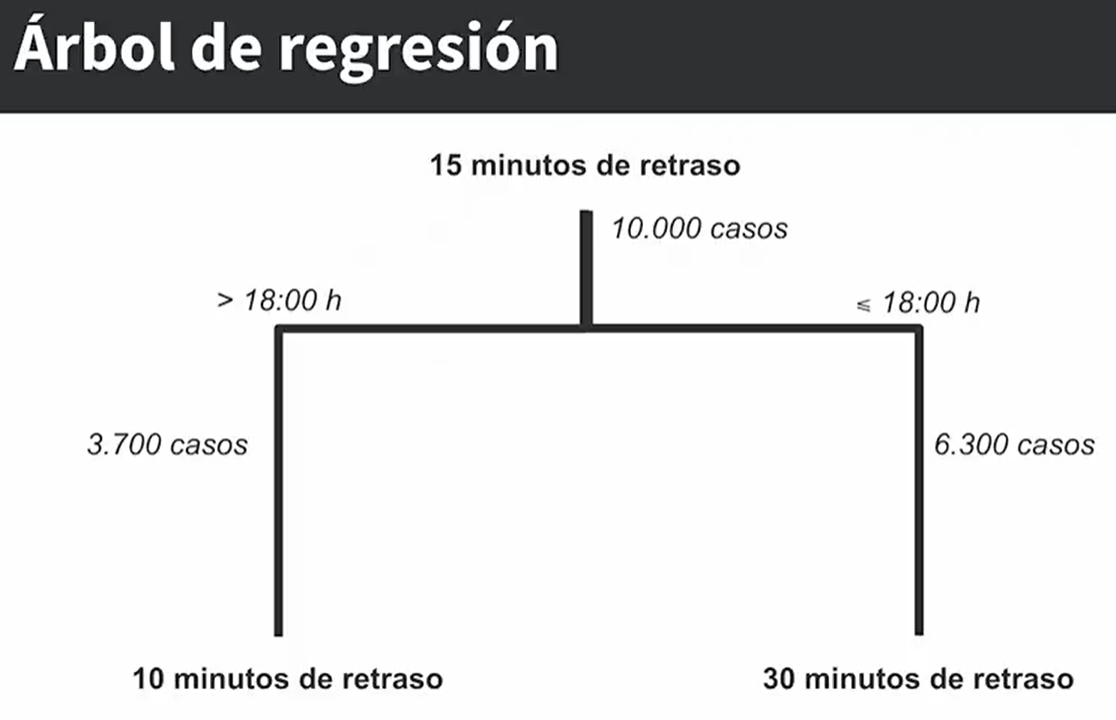

In [47]:
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Eliminamos con dropna el subset ArrDelay los datos faltantes,
# Reordenamos con sample (frac = 1)
# Partimos en dos dataframes, el último medio millón de casos y los primeros.

df = pd.read_csv("base_datos_2008.csv")
df = df.dropna(subset = ["ArrDelay"])
df = df.sample(frac = 1)

#dftest = df.tail(500000)
#df = df.head(500000)
dftest = df.tail(1000)
df = df.head(1000)

In [48]:
clf = tree.DecisionTreeClassifier()

# Entrenaremos el objeto clf utilizando el método fit con la variable regresora X y la respuesta Y

X = df[["Distance", "AirTime", "DepTime", "TaxiIn", "TaxiOut", "DepDelay"]]
X_test = dftest[["Distance", "AirTime", "DepTime", "TaxiIn", "TaxiOut", "DepDelay"]]
Y = df["ArrDelay"] > 10
Y_test = dftest["ArrDelay"] > 10

clf = clf.fit(X, Y)
Y_pred = clf.predict(X)
Y_pred_test = clf.predict(X_test)

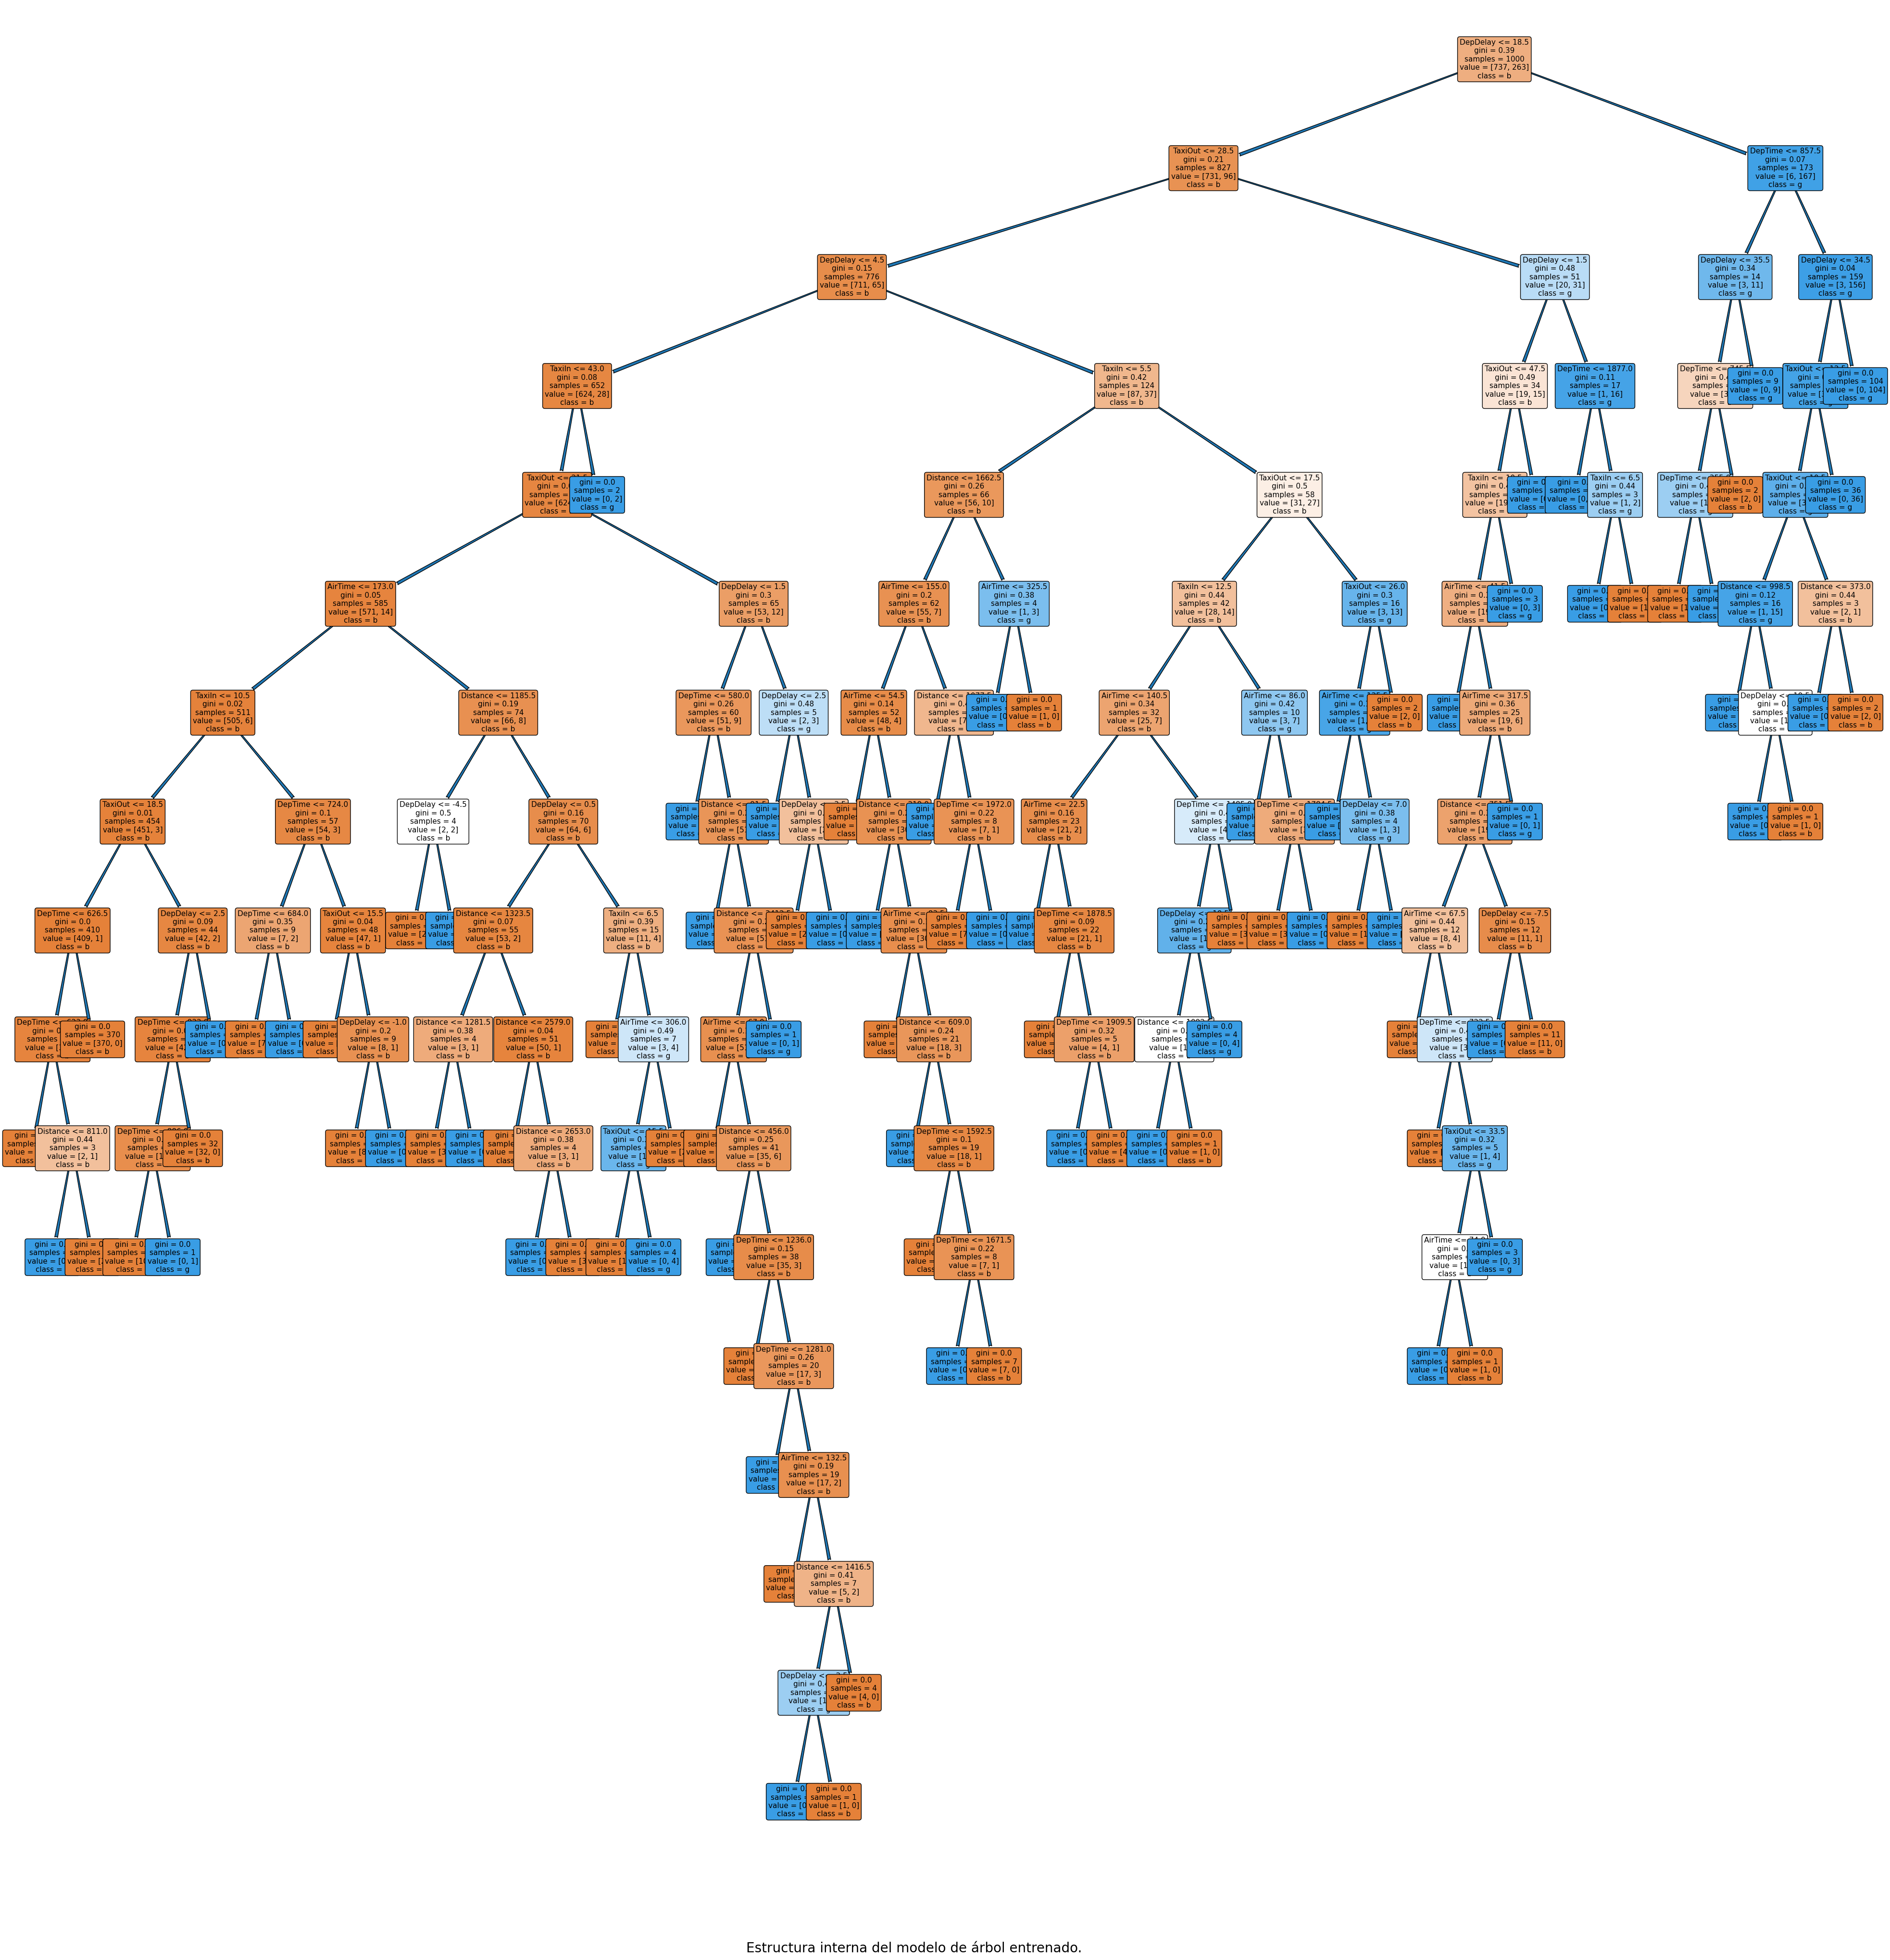

In [49]:
fig, ax = plt.subplots(figsize=(50,50))
out = tree.plot_tree(clf,
               feature_names= X.columns,
               class_names = ["b","g"],
               fontsize= 11, 
               filled = True, 
               label = 'all',
               precision= 2,
               rounded = True, 
#                ax = ax
              )
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
        arrow.set_arrowstyle("fancy")
        
plt.figtext(0.5,0.07, "Estructura interna del modelo de árbol entrenado.", fontsize = 20, ha = 'center')
plt.show()

In [50]:
np.mean(Y == Y_pred)

1.0

In [51]:
# Nuestro modelo está clasificando perfectamente todos los datos.
# Crea un árbol que predice exactamente todas las observaciones, hay que evitarlo.
# Para ello, hay que comparar el conjunto de test con la previsión, hacemos una validación externa con el conjunto test.

np.mean(Y_test == Y_pred_test)

0.892

In [52]:
# Utilizando el R-cuadrado, una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada.
# En este caso tenemos una respuesta numérica.

clf = tree.DecisionTreeRegressor()

Y = df["ArrDelay"]
Y_test = dftest["ArrDelay"]

clf = clf.fit(X, Y)
Y_pred = clf.predict(X)
Y_pred_test = clf.predict(X_test)

print("R cuadrado: ", r2_score(Y, Y_pred))
print("R cuadrado test: ", r2_score(Y_test, Y_pred_test))


R cuadrado:  1.0
R cuadrado test:  0.7790682559110249


# Random Forest

https://en.wikipedia.org/wiki/Random_forest


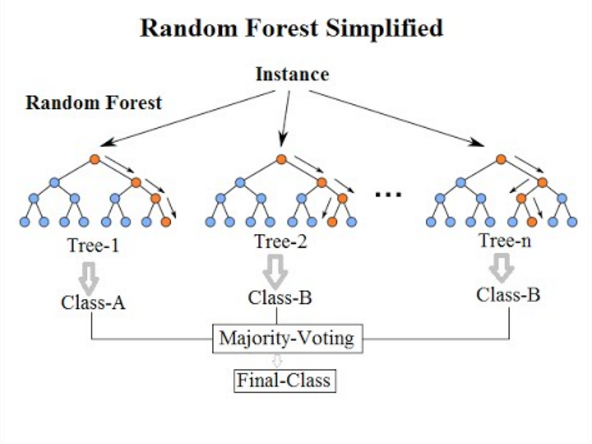

In [53]:
# Selecciona de forma aleatoria observaciones de nuestra base de datos. Crea nuevos árboles de regresión y clasificación.
# Da un peso variable a las distintas observaciones y variables.

from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("base_datos_2008.csv")
df = df.dropna(subset = ["ArrDelay"])
df = df.sample(frac = 1)
dftest = df.tail(500000)
df = df.head(500000)

In [54]:
clf = tree.DecisionTreeClassifier()

X = df[["Distance", "AirTime", "DepTime", "TaxiIn", "TaxiOut", "DepDelay"]]
X_test = dftest[["Distance", "AirTime", "DepTime", "TaxiIn", "TaxiOut", "DepDelay"]]
Y = df["ArrDelay"] > 10

# Variable respuesta
Y_test = dftest["ArrDelay"] > 10

# Entrenando nuestro modelo
clf = clf.fit(X, Y)
Y_pred_test = clf.predict(X_test)

In [55]:
np.mean(Y_test == Y_pred_test)

0.893802

In [56]:
# Vamos a comparar con RandomForest, generamos 100 árboles y que utilice todos los núcleos de nuestro PC

clf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
clf.fit(X, Y)
Y_pred_test = clf.predict(X_test)

# Clasificamos las variables con mayor importancia, el retraso de salida DepDelay es el más aproximado.
clf.feature_importances_

array([0.09178851, 0.08110954, 0.08344118, 0.05060975, 0.13156689,
       0.56148413])

In [57]:
# Incrementa en un 3% la predicción del modelo anterior (árbol de clasificación).
np.mean(Y_test == Y_pred_test)

0.92393

Si la variable respuesta fuera numérica utilizaríamos
RandomForestRegressor()
La métrica sería R2 en lugar de la comparación entre el modelo de test y el predictivo.

# Support Vector Machine

https://scikit-learn.org/stable/modules/svm.html

Las ventajas de las máquinas de vectores de soporte son:

- Efectivo en espacios de gran dimensión.

- Sigue siendo eficaz en los casos en que el número de dimensiones es mayor que el número de muestras.

- Utiliza un subconjunto de puntos de entrenamiento en la función de decisión (llamados vectores de soporte), por lo que también es eficiente en la memoria.

- Versátil: se pueden especificar diferentes funciones del núcleo para la función de decisión. Se proporcionan núcleos comunes, pero también es posible especificar núcleos personalizados.

In [58]:
# Divide los conjuntos de puntos mediante una recta, intentando maximizar la distancia de los puntos más cercanos a la recta.

from sklearn.svm import SVC
import numpy as np
import pandas as pd

df = pd.read_csv("base_datos_2008.csv")
df = df.dropna(subset = ["ArrDelay"])
df = df.sample(frac = 1)
dftest = df.tail(1000)
df = df.head(1000)

In [59]:
X = df[["Distance", "AirTime", "DepTime", "TaxiIn", "TaxiOut", "DepDelay"]]
X_test = dftest[["Distance", "AirTime", "DepTime", "TaxiIn", "TaxiOut", "DepDelay"]]
Y = df["ArrDelay"] > 10

# Variable respuesta
Y_test = dftest["ArrDelay"] > 10

# Entrenando nuestro modelo
clf = SVC(kernel = "linear") # Probad con los distintos kernels: kernel = "linear"; kernel = "poly"; kernel = "rbf"; kernel = "sigmoid"
clf = clf.fit(X, Y)
Y_pred_test = clf.predict(X_test)

In [60]:
np.mean(Y_test == Y_pred_test)

0.921

# Modelo K-Nearest

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

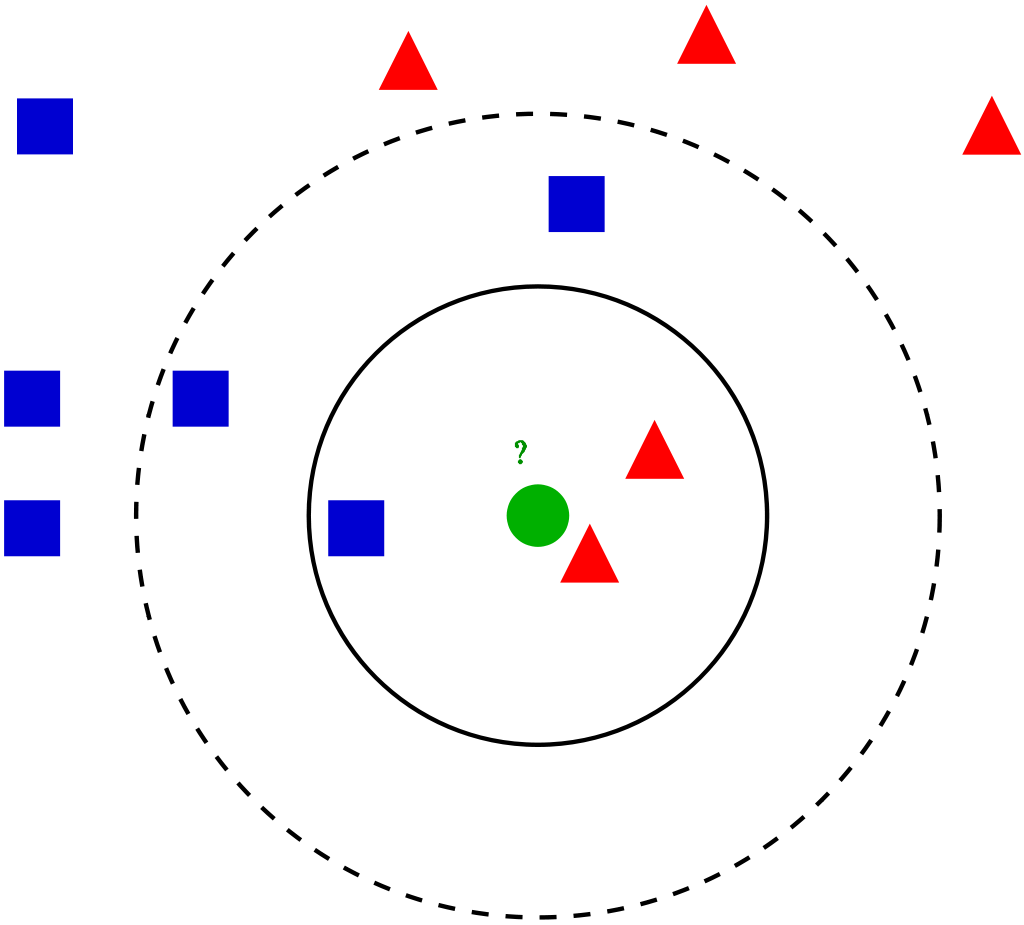

In [61]:
# Clasifica cada punto en una categoría dependiendo basándose en la categoría de sus vecinos más cercanos.
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

df = pd.read_csv("base_datos_2008.csv", nrows = 1e6)

In [62]:
newdf = df[["AirTime", "Distance", "TaxiOut", "ArrDelay"]].dropna()
cols = newdf[newdf.columns[newdf.columns != "ArrDelay"]]

In [63]:
filtro = newdf["ArrDelay"] > 10

In [64]:
# Ponemos etiquetas a nuestros casos.
newdf["ArrDelay"][filtro] = "Delayed"
newdf["ArrDelay"][filtro == False] = "Not Delayed"

In [65]:
newdf["ArrDelay"].head()

0    Not Delayed
1    Not Delayed
2        Delayed
3    Not Delayed
4        Delayed
Name: ArrDelay, dtype: object

In [66]:
# Sugiero utilizar un número impar para la comparación entre vecinos, de forma que podamos dilucidar posibles empates...

nbrs_3 = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1)

In [67]:
nbrs_3.fit(cols, newdf["ArrDelay"])

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [68]:
predicciones_3 = nbrs_3.predict(cols)

In [69]:
np.mean(predicciones_3 == newdf["ArrDelay"])

0.8033585363402913

In [70]:
# El 80,4% están clasificados correctamente, esta medida puede ser engañosa, ya que no conocemos la proporción de nuestros datos
np.mean(newdf["ArrDelay"] == "Not Delayed")

0.6912450368307814

In [71]:
# Casi el 70% de vuelos no se han retrasado, con el modelo estamos indicando 80,4%, hay una desviación de 10 puntos.
# Vamos a ir ajustando mejor la métrica, miramos solo el vecino de al lado.
nbrs_1 = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1)
nbrs_1.fit(cols, newdf["ArrDelay"])
predicciones_1 = nbrs_1.predict(cols)
np.mean(predicciones_1 == newdf["ArrDelay"])

0.833027230227863

In [72]:
# Observando el vecino más cercano obtenemos una mejor predicción que observando los tres más cercanos.
np.mean(newdf["ArrDelay"] == "Not Delayed")

0.6912450368307814

In [73]:
# Exploramos la matriz de confusión para ver cuánto de bien hemos predicho los casos.
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(newdf["ArrDelay"], predicciones_1)
print(confusion_matrix)

[[217673  80387]
 [ 80802 586499]]


In [74]:
# (0,0) -> En este caso el valor real de los datos eran 0 (False = con retraso) y el modelo ha predicho como 0 (con retraso).
# (0,1) -> En este caso el valor real de los datos eran 0 (False = con retraso) y el modelo ha predicho como 1 (sin retraso).
# (1,0) -> En este caso el valor real de los datos eran 1 (True = sin retraso) y el modelo ha predicho como 0 (con retraso).
# (1,1) -> En este caso el valor real de los datos eran 1 (True = sin retraso) y el modelo ha predicho como 1 (sin retraso).

# Validación Externa en Python

Cuando usemos todos los datos para entrenar y evaluar, tenemos evaluación interna. Si tenemos un conjunto de datos para entrenar y otro para evaluar estamos en la evaluación externa.
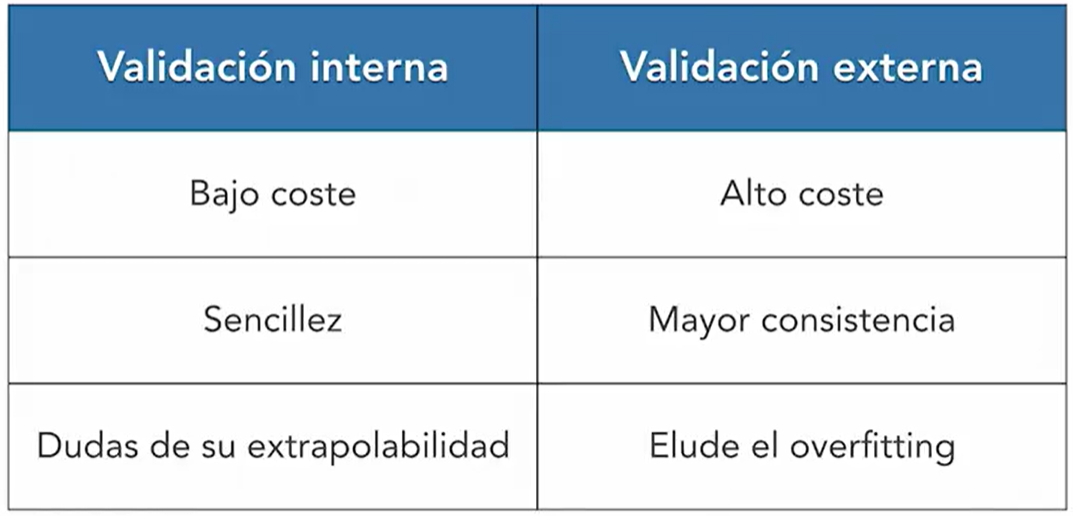

Los tipos de validación que podemos tener son:

- Interna, para ello se utilizan todos los datos para hacer todo.
- Externa aleatoria, se subdivide un conjunto de datos aleatorio para el train y para el test.
- Externa k-fold, se realiza el mismo proceso pero múltiples veces. Esto es, si particiono el conjunto de datos en subconjuntos de entrenamiento, estos es evaluamos los conjuntos 1,2,3 y se evalúan sobre el bloque 4; en la siguiente iteración se utilizarán los bloques 1,2,4 para evaluarlos sobre el el bloque 3... y así sucesivamente.
- Leave One Out, parecido al anterior, pero se deja fuera de la validación un punto y se realiza el mismo proceso para el resto de puntos de la BD. Como se puede ver esto es muy costoso en tiempo... pero permite una estimación muy precisa.
- Boostrap, obtenemos estimadores basándonos en remuestreo y reemplazamiento.

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

In [76]:
data = pd.read_csv("base_datos_2008.csv")

In [77]:
df = data.dropna(subset = ["ArrDelay"])
df = df.sample(frac=1).head(1000)

X = df[['AirTime', 'Distance', 'DepDelay']]
Y = df['ArrDelay']

In [78]:
# El tamaño del test se establece en un 20% e incluimos el atributo random_state = 10 fijo una semilla para que cuando 
# se vuelva a repetir el ejercicio obtener el mismo resultado.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =.2, random_state = 10)

In [79]:
# En este primer caso estamos ajustando un modelo R2 teniendo en cuenta el conjunto de datos
regrINTERNA = linear_model.LinearRegression()
regrINTERNA.fit(X, Y)
prediccionesINTERNA = regrINTERNA.predict(X)
print("R2: ", r2_score(Y, prediccionesINTERNA))

# En este segundo caso estamos ajustando un modelo R2 teniendo en cuenta el conjunto de entrenamiento y test
regrEXTERNA = linear_model.LinearRegression()
regrEXTERNA.fit(X_train, y_train)
prediccionesEXTERNA = regrEXTERNA.predict(X_test)
print("R2: ", r2_score(y_test, prediccionesEXTERNA))

# En principio el R2 correspondiente al ajuste con todos los datos y lo evaluamos con los mismos datos, 
# tendemos a sobreajustar el modelo, esto implica tener unos resultados de predicción mucho más elevados
# que en el caso de utilizar unos datos de entrenamiento. 

R2:  0.8722441989914932
R2:  0.9421777084455826


# K-Fold

https://es.wikipedia.org/wiki/Validaci%C3%B3n_cruzada

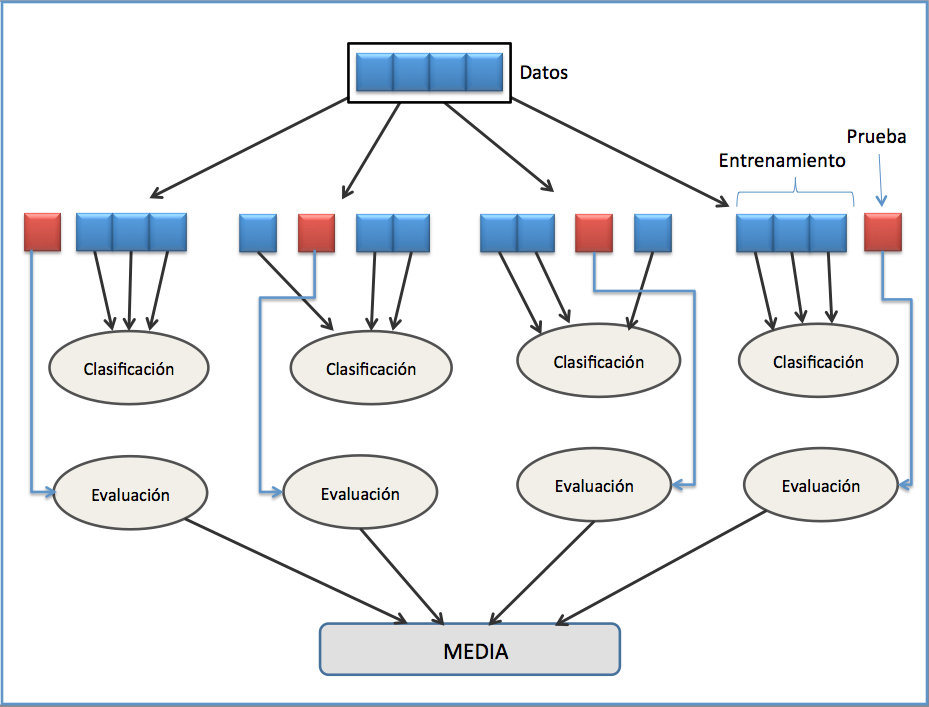

In [80]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np

# En el caso anterior dependiendo de los datos que caigan en Train o en Testing el R2 variará.
# Con K-Fold lo que hacemos es obtener una media de un conjunto de particiones de datos, de forma que el resultado
# obtenido puede ser más fiable.
# Replicamos múltiples veces este proceso:  
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =.2, random_state = 10)

In [81]:
data = pd.read_csv("base_datos_2008.csv")

In [82]:
df = data.dropna(subset = ["ArrDelay"])
df = df.sample(frac=1).head(5000)

# Reseteamos el index de nuestra base de datos al hacer selección aleatoria para que comience de nuevo en 0.
df = df.reset_index()

X = df[['AirTime', 'Distance', 'DepDelay']]
Y = df['ArrDelay']

In [83]:
# Hacemos una partición en 10 bloques, y cada vez que haga una partición mezcle los datos shuffle = True
kf = KFold(n_splits = 10, shuffle = True)
kf.get_n_splits(X)

10

In [84]:
regr = linear_model.LinearRegression()

# Creamos un vector donde vamos a estar guardando todos los resultados.
resultados = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index,], X.loc[test_index,]
    y_train, y_test = Y[train_index], Y[test_index]
    regr.fit(X_train, y_train)
    predicciones = regr.predict(X_test)
    print("R2: ", r2_score(y_test, predicciones))
    resultados.append(r2_score(y_test, predicciones))
print("R2 medio: ", np.mean(resultados))

# Compensamos la dependencia de datos concretos, es mucho más representativa utilizar KFold

R2:  0.9265749181888624
R2:  0.9153933327328598
R2:  0.8656500745554003
R2:  0.8999893477972104
R2:  0.8746798514235694
R2:  0.8780702938962202
R2:  0.9248879657365656
R2:  0.9209949299498124
R2:  0.8298382333542755
R2:  0.8526273917506496
R2 medio:  0.8888706339385426


# Leave one out

https://www.cienciadedatos.net/documentos/30_cross-validation_oneleaveout_bootstrap

In [85]:
# En este caso vamos a entrenar el modelo con todos los datos menos uno.
# De utilidad cuando tenemos tamaños de muestra muy reducidos, ya que si no repeteríamos el proceso n-1 veces.
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn import linear_model
import numpy as np

In [86]:
data = pd.read_csv("base_datos_2008.csv")

In [87]:
df = data.dropna(subset = ["ArrDelay"])
df = df.sample(frac=1).head(5000)

# Reseteamos el index de nuestra base de datos al hacer selección aleatoria.
df = df.reset_index()

X = df[['AirTime', 'Distance', 'DepDelay']]
Y = df['ArrDelay']

In [88]:
loo = LeaveOneOut()

In [ ]:
for train_index, test_index in loo.split(X):
    X_train, X_test = X.loc[train_index,], X.loc[test_index,]
    y_train, y_test = Y[train_index], Y[test_index]
    regr.fit(X_train, y_train)
    predicciones = regr.predict(X_test)
    print("Error: ", (y_test - predicciones[0])**2)

Es importante que la salida la podamos guardar en un fichero, realizar un histograma y poder así analizar cómo se comporta el algoritmo cuando va dejando un punto fuera... Este tipo de evaluación no es muy popular ya que es muy costosa, cuando hay pocos puntos se puede utilizar, pero cuando hay muchos, el coste no compensa.

# Redes Neuronales

https://es.wikipedia.org/wiki/Red_neuronal_artificial

En la primera capa tenemos las entradas y las salidas. Y la parte principal, la capa oculta... el coste computacional es muy elevado. Intentamos explicar nuestras salidas en función de las entradas. Pero necesitamos entender qué hace la capa oculta.

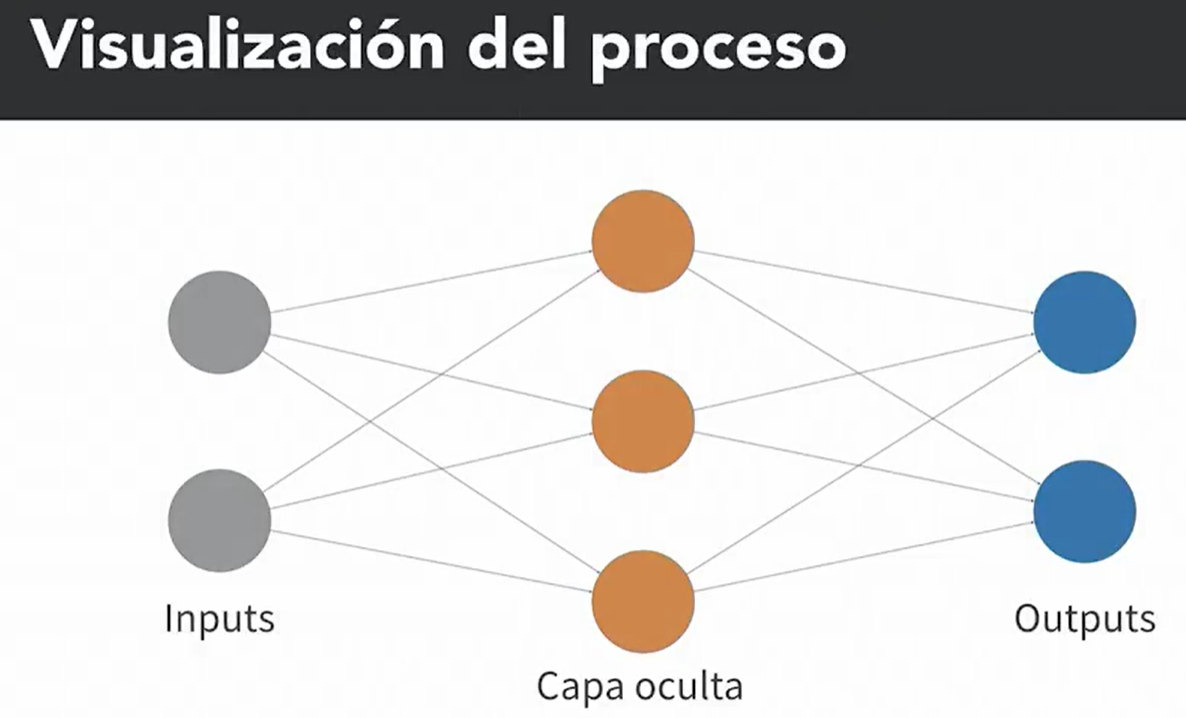

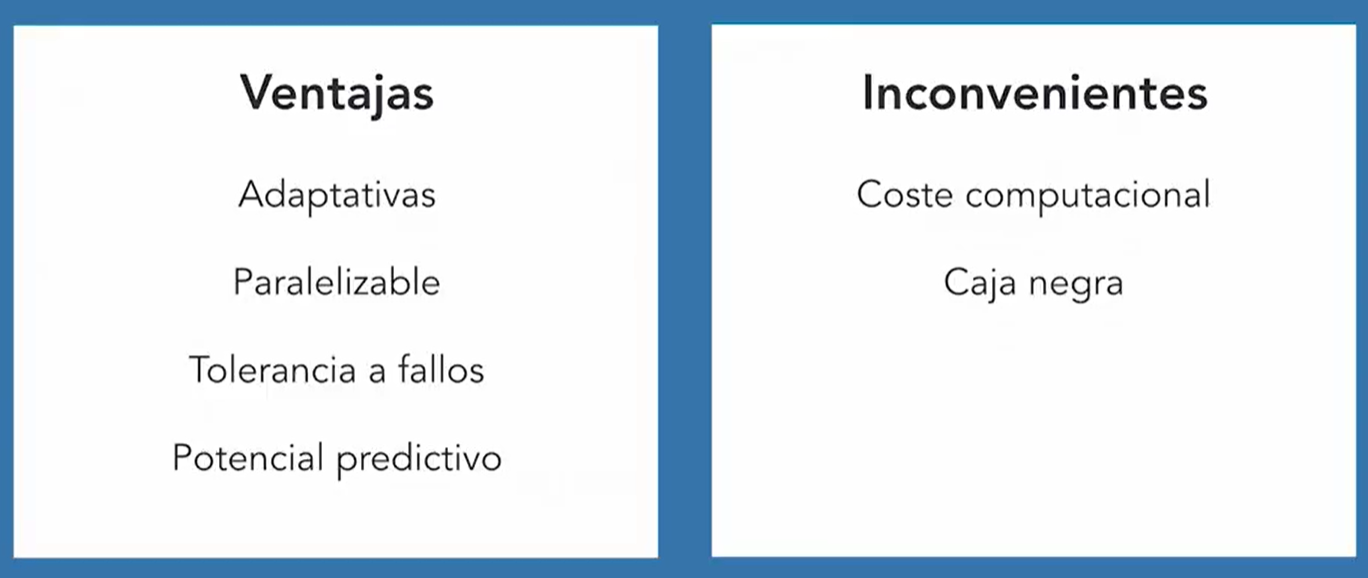

In [90]:
## Esta primera si tenemos datos categóricos.
from sklearn.neural_network import MLPClassifier
## Esta segunda si tenemos datos numéricos.
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

In [91]:
data = pd.read_csv("base_datos_2008.csv")

In [92]:
df = data.dropna(subset = ['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay'])
df = df.sample(frac = 1).head(1000)

In [93]:
X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay']]
Y = df['ArrDelay']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =.2, random_state = 1)

In [95]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [96]:
clf = MLPRegressor(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (5,))

model = clf.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R cuadrado: ", r2_score(y_test, predictions))

# Revisar los parámetros que podemos incluir en clf y experimentar con ellos. Ya que no hay una regla que diga lo que es mejor
# o peor en todas las ocasiones.

R cuadrado:  0.9171441571447785


C:\Users\Carlow\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# XGBoost y árboles de clasificación

- https://en.wikipedia.org/wiki/XGBoost
- https://xgboost.readthedocs.io/en/latest/ 

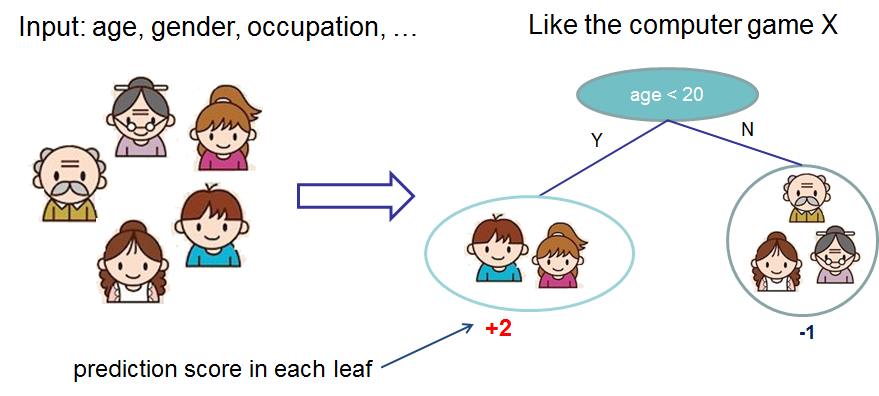

Es un modelo basado en los árboles de clasificación y regresión, donde estamos mezclando varios árboles y evaluando cuál de bueno es el modelo.

In [97]:
# pip install xgboost
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

In [98]:
data = pd.read_csv("base_datos_2008.csv")

In [99]:
df = data.dropna(subset = ["ArrDelay"])
df = df.sample(frac = 1).head(10000)

X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay']]
Y = df['ArrDelay']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =.2, random_state = 1)

In [101]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
model = XGBRegressor(n_jobs = -1, learning_rate = .5, max_depth = 2, colsample_bytree = 1, verbosity = 2, subsample = 1,
                     n_estimators = 500)

In [ ]:
model.fit(X_train, y_train)

In [104]:
predictions = model.predict(X_test)
print("R cuadrado: ", r2_score(y_test, predictions))

R cuadrado:  0.9211581253698689
